In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import csv
import os
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
from shutil import copyfile

In [4]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

In [5]:
path = Path('/data/Datasets/EIPH_WSI/Patches_train_val/')

In [6]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=True, 
                      max_rotate=90,  
                      max_lighting=0.0, 
                      #max_zoom=2, 
                      #max_warp=0.2,
                      #p_affine=0.75,
                      #p_lighting=0.75,  
                      #xtra_tfms=xtra_tfms,
                     )

In [7]:
def get_data(bs,size):
    data = ImageDataBunch.from_folder(path, train="train", valid="val", test="val", size=size, bs=bs, ds_tfms=tfms)
    return data.normalize()

In [8]:
data = get_data(64,64)

In [20]:
help(data.show_batch)

Help on method show_batch in module fastai.basic_data:

show_batch(rows:int=5, ds_type:fastai.basic_data.DatasetType=<DatasetType.Train: 1>, reverse:bool=False, **kwargs) -> None method of fastai.vision.data.ImageDataBunch instance
    Show a batch of data in `ds_type` on a few `rows`.



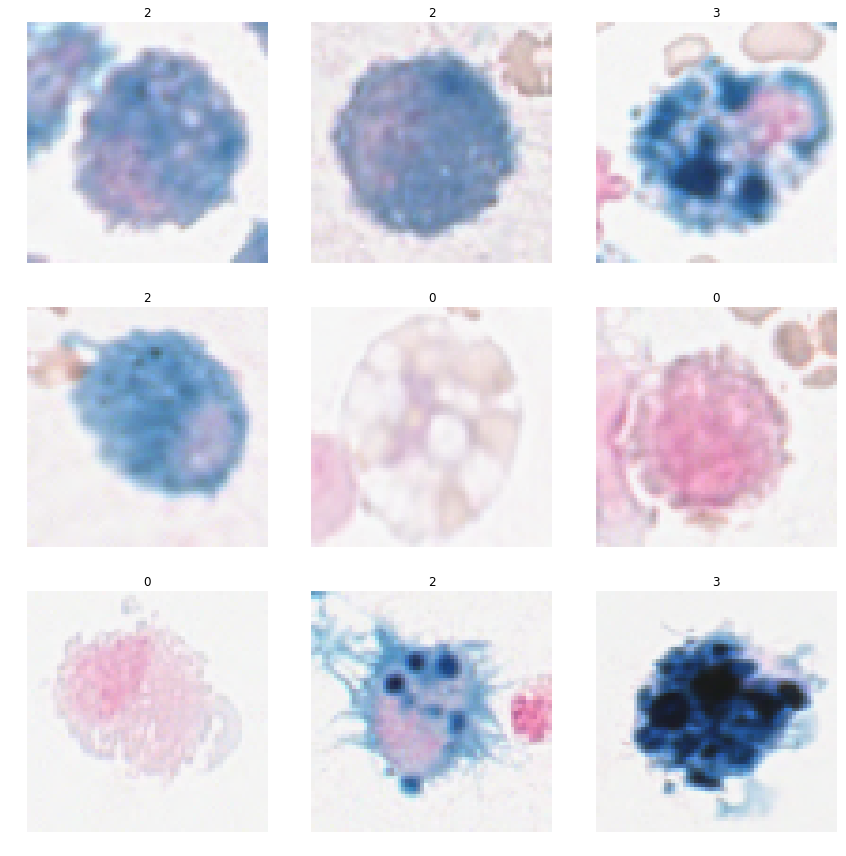

In [9]:
fig = data.show_batch(3, return_fig=True)

In [25]:
fig.savefig("klassification.svg")

In [9]:
learn = create_cnn(get_data(256,128), models.resnet18, metrics=error_rate, callback_fns=[ShowGraph])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


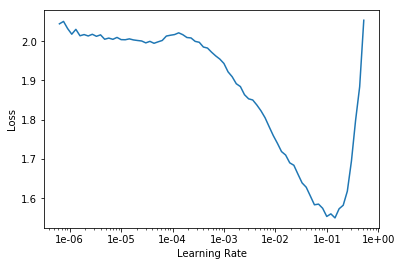

In [20]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,0.407954,0.419741,0.174000,01:04
1,0.389254,0.450599,0.167000,01:03
2,0.349281,0.355739,0.145500,00:55
3,0.318907,0.375088,0.163000,00:57
4,0.296265,0.366437,0.158000,00:58


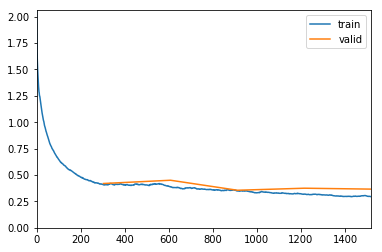

In [10]:
lr = 0.05
learn.fit_one_cycle(5, slice(lr))

In [11]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time
0,0.294610,0.366271,0.157000,01:06
1,0.299454,0.385872,0.162500,01:05
2,0.288780,0.394433,0.160000,01:03
3,0.283903,0.349481,0.147500,01:03
4,0.283343,0.376617,0.150500,01:04
5,0.282478,0.364750,0.155000,01:04


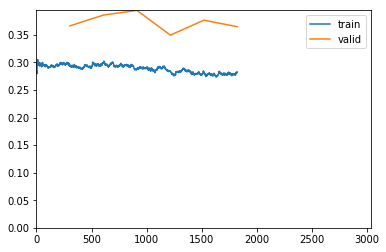

KeyboardInterrupt: 

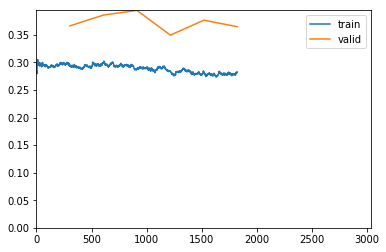

In [12]:
lr = 0.001
learn.fit_one_cycle(10, slice(1e-5, lr/5))

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

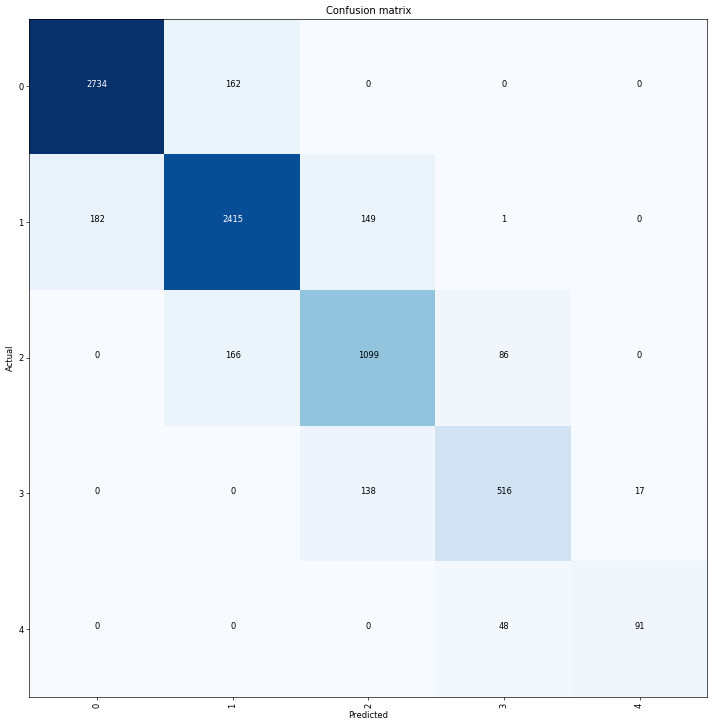

In [17]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [18]:
interp.most_confused(min_val=2)

[('1', '0', 182),
 ('2', '1', 166),
 ('0', '1', 162),
 ('1', '2', 149),
 ('3', '2', 138),
 ('2', '3', 86),
 ('4', '3', 48),
 ('3', '4', 17)]

In [26]:
preds_test, _ = learn.get_preds(ds_type=DatasetType.Test)
values, indices = torch.max(preds_test, 1)

v0 = Path("/data/Datasets/EIPH_WSI/HumanExpert/DL/v0/")
for fn, y in zip(learn.data.test_dl.items, indices):
    target_path =  v0/"{0}/{1}".format(y, fn.name)
    copyfile(str(fn), str(target_path))

In [27]:
preds_test, _ = learn.get_preds(ds_type=DatasetType.Test)
values, indices = torch.max(preds_test, 1)

v0 = Path("/data/Datasets/EIPH_WSI/HumanExpert/DL/v1/")
for fn, y in zip(learn.data.test_dl.items, indices):
    target_path =  v0/"{0}/{1}".format(y, fn.name)
    copyfile(str(fn), str(target_path))